## Importando bibliotecas

In [ ]:
import os, random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from random import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics,svm
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from skimage import exposure
from skimage.measure import regionprops
from skimage.filters import threshold_otsu
from sklearn.preprocessing import MaxAbsScaler
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Masking
from keras.utils import np_utils, to_categorical

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Carregando o conjuntos de dados

In [ ]:
def load_data(datadir, classes, img_size=100):
    training_data = []
    label = []
    for classe in range(len(classes)):
        path = os.path.join(datadir, classes[classe])
        shufled_list  = list(os.listdir(path))
        shuffle(shufled_list)
        for img in shufled_list:
            img_array = cv2.imread(os.path.join(path, img))
            img_array = cv2.resize(img_array, (img_size, img_size))
            unique = np.unique(img_array)
            if len(unique) == 1:
                continue
            training_data.append(img_array)
            label.append(classe)
    return training_data , label

In [ ]:
data , label = load_data('/content/drive/MyDrive/CV/img_data/train',['fire','smoke','default'])

In [ ]:
print('fire: ', label.count(0))
print('smoke: ', label.count(1))
print('default: ', label.count(2))

fire:  274
smoke:  258
default:  161


In [ ]:
def extract_color_hist(image):
    imgblur = cv2.GaussianBlur(image, (13,13), 3)
    imgDetalhes = 3 * cv2.subtract(image, imgblur)
    imgRealcada = cv2.add(image, imgDetalhes)
    image_eq = exposure.equalize_hist(imgRealcada)
    return image_eq.flatten()

def extract_color_hist2(image):
    imgSuavizada = cv2.GaussianBlur(image, (13,13), 3)
    imgDetalhes = 3 * cv2.subtract(image, imgSuavizada)
    imgRealcada = cv2.add(image, imgDetalhes)
 
    hsv = cv2.cvtColor(imgRealcada, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, (8, 8, 8), [ 0 , 256 , 0 , 256 , 0 , 256 ])
    hist_norm = cv2.normalize(hist, hist)
    return hist_norm.flatten()

def extract_color_hist_rgb(image):
    imgSuavizada = cv2.GaussianBlur(image, (13,13), 3)
    imgDetalhes = 3 * cv2.subtract(image, imgSuavizada)
    imgRealcada = cv2.add(image, imgDetalhes)
 
    hist = cv2.calcHist([imgRealcada], [0, 1, 2], None, (8, 8, 8), [ 0 , 256 , 0 , 256 , 0 , 256 ])
    hist_norm = cv2.normalize(hist, hist)
    return hist_norm.flatten()


In [ ]:
def extract_histogram(image): 
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, (8, 8, 8), [ 0 , 256 , 0 , 256 , 0 , 256 ])
    hist_norm = cv2.normalize(hist, hist)
    return hist_norm.flatten()

def extract_histogram_realce(image):
    imgSuavizada = cv2.GaussianBlur(image, (13,13), 3)
    imgDetalhes = 3 * cv2.subtract(image, imgSuavizada)
    imgRealcada = cv2.add(image, imgDetalhes)
    
    hsv = cv2.cvtColor(imgRealcada, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, (8, 8, 8), [ 0 , 256 , 0 , 256 , 0 , 256 ])
    hist_norm = cv2.normalize(hist, hist)
    return hist_norm.flatten()

In [ ]:
def extract_hsv_eq(image):
    imgblur = cv2.GaussianBlur(image, (13,13), 3)
    imgDetalhes = 3 * cv2.subtract(image, imgblur)
    imgRealcada = cv2.add(image, imgDetalhes)
    hsv = cv2.cvtColor(imgRealcada, cv2.COLOR_BGR2HSV)
    image_eq = exposure.equalize_hist(hsv)
    return image_eq.flatten()

##Extração dos Atributos

In [ ]:
def features_extrac_hist(images):
    features_list = []
    for image in images:
        hist = extract_histogram_realce(image)
        features_list.append(hist)
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

features2 = features_extrac_hist(data)

In [ ]:
def features_extrac_histr(images):
    features_list = []
    for image in images:
        hist = extract_histogram_realce(image)
        features_list.append(hist)
    norm =  MaxAbsScaler()
    norm.fit(features_list)
    norm_features = norm.transform(features_list)
    return norm_features

features3 = features_extrac_histr(data)

In [ ]:
def features_extrac_hist_wo_norm(images):
    features_list = []
    for image in images:
        hist = extract_histogram(image)
        features_list.append(hist)
    return features_list

features4 = features_extrac_hist_wo_norm(data)

In [ ]:
def features_extrac_color_hist(images):
    features_list = []
    for image in images:
        hist = extract_color_hist(image)
        features_list.append(hist)
    return features_list

features5 = features_extrac_color_hist(data)

/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


In [ ]:
def features_extrac_color_hist2(images):
    features_list = []
    for image in images:
        hist = extract_color_hist2(image)
        features_list.append(hist)
    return features_list

features6 = features_extrac_color_hist(data)

In [ ]:
def features_color_hist_rgb(images):
    features_list = []
    for image in images:
        hist = extract_color_hist_rgb(image)
        features_list.append(hist)
    return features_list

features7 = features_color_hist_rgb(data)

In [ ]:
def features_histogram_hsv_eq(images):
    features_list = []
    for image in images:
        hist = extract_hsv_eq(image)
        features_list.append(hist)
    return features_list

features8 = features_histogram_hsv_eq(data)

## Treinando os Modelos

Os  modelos escolhidos foram:
- **KNN**;
- **MLP**;
- **SGDC**;
- **SVM**;
- **Árvore de Decisão**;
- **Naive Bayes**;
- **Random Forest**.


In [ ]:
def generate_svm_model(train_data, label_train_data, test_data):
    clf = svm.SVC(kernel='linear', random_state=42)
    clf.fit(train_data, label_train_data)
    predicted = clf.predict(test_data)
    return predicted
def generate_SGDC_model(train_data, label_train_data, test_data):
    clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=200, random_state=42)
    clf.fit(train_data, label_train_data)
    predicted = clf.predict(test_data)
    return predicted
def generate_naive_bayes_model(train_data, label_train_data, test_data):
    gnb = GaussianNB()
    gnb.fit(train_data, label_train_data)
    predicted = gnb.predict(test_data)
    return predicted
def generate_decision_tree_model(train_data, label_train_data, test_data):
    clf = tree.DecisionTreeClassifier(random_state=42)
    clf = clf.fit(train_data, label_train_data)
    predicted = clf.predict(test_data)
    return predicted
def generate_random_forest_model(X_train, y_train, test_data):
    rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 8, max_features='auto', n_estimators=300, random_state=42)
    rfc.fit(X_train,y_train)
    predicted = rfc.predict(test_data)
    return predicted
def generate_MLP_model(X_train, y_train, test_data):
    classifier = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, activation = 'relu', solver='adam', random_state=42)
    classifier.fit(X_train, y_train)
    predicted = classifier.predict(test_data)
    return predicted
def generate_knn_model(train_data, label_train_data, test_data):
    knn = KNeighborsClassifier()
    knn.fit(train_data,label_train_data)
    predicted = knn.predict(test_data)
    return predicted

In [ ]:
def gen_classifiers(train_data,label_train_data,test_data):
    return generate_knn_model(train_data,label_train_data,test_data),\
    generate_MLP_model(train_data,label_train_data,test_data),\
    generate_SGDC_model(train_data,label_train_data,test_data),\
    generate_svm_model(train_data,label_train_data,test_data),\
    generate_decision_tree_model(train_data,label_train_data,test_data),\
    generate_naive_bayes_model(train_data,label_train_data,test_data),\
    generate_random_forest_model(train_data,label_train_data,test_data),


In [ ]:
X_train ,X_test, y_train, y_test = train_test_split(features3, label, test_size=0.25, random_state=42)
results = gen_classifiers(X_train, y_train, X_test)

##Avaliando os modelos

#### As métricas utilizados para avaliar o desempenho dos modelos de classificação foram:

- **Acurácia**;
- **Recall**;
- **Precisão**;
- **F1-Score**. <br> 

In [ ]:
def get_confusion_matrix(y_true, y_pred, model):
    plt.subplots(figsize=(8,6))
    labels = ['fire','smoke','default']
    cm = metrics.confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu').set(title=model, ylabel='Real', xlabel='Predito', 
                                                            yticklabels=labels,
                                                            xticklabels=labels)

KNN
Acurácia:  0.9195402298850575
Recall:  [0.95833333 0.90769231 0.86486486]
Precisão:  [0.95833333 0.90769231 0.86486486]
F1-score:  [0.95833333 0.90769231 0.86486486]


MLP
Acurácia:  0.9482758620689655
Recall:  [0.98611111 0.92307692 0.91891892]
Precisão:  [0.98611111 0.95238095 0.87179487]
F1-score:  [0.98611111 0.9375     0.89473684]


SGDC
Acurácia:  0.9252873563218391
Recall:  [1.         0.93846154 0.75675676]
Precisão:  [0.91139241 0.92424242 0.96551724]
F1-score:  [0.95364238 0.93129771 0.84848485]


SVM
Acurácia:  0.9195402298850575
Recall:  [0.97222222 0.90769231 0.83783784]
Precisão:  [0.93333333 0.921875   0.88571429]
F1-score:  [0.95238095 0.91472868 0.86111111]


Árvore de Decisão
Acurácia:  0.8390804597701149
Recall:  [0.90277778 0.76923077 0.83783784]
Precisão:  [0.94202899 0.86206897 0.65957447]
F1-score:  [0.92198582 0.81300813 0.73809524]


Naive Bayes
Acurácia:  0.6896551724137931
Recall:  [0.59722222 0.83076923 0.62162162]
Precisão:  [0.93478261 0.71052632 0.442

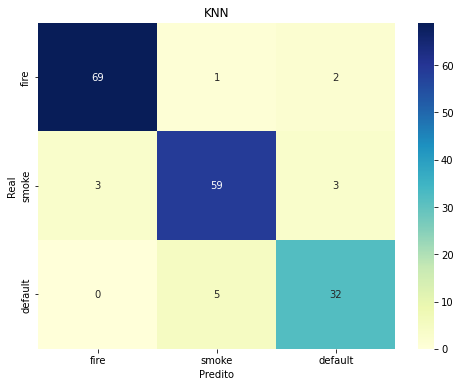

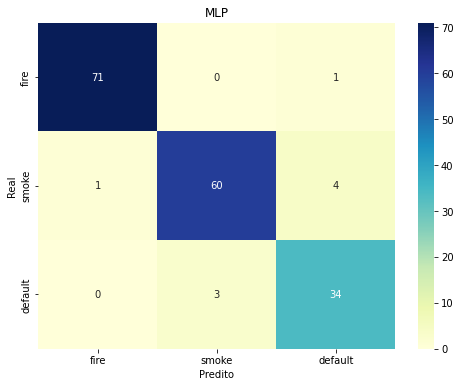

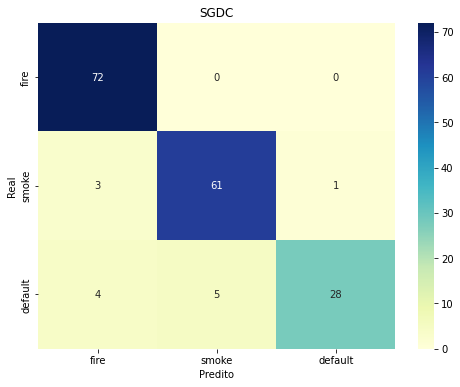

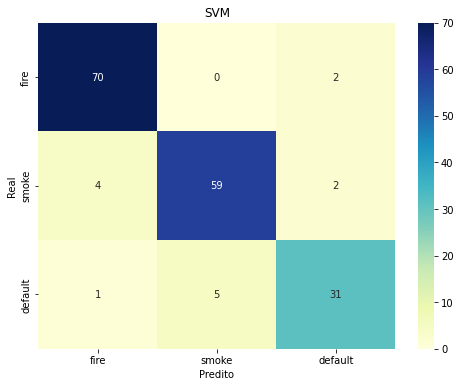

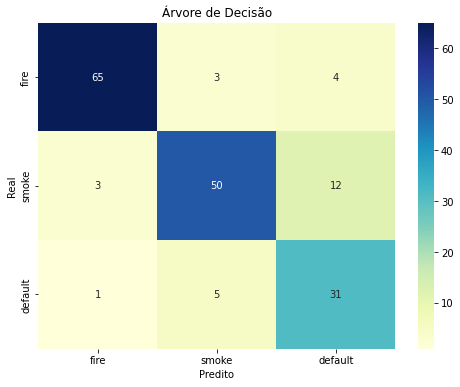

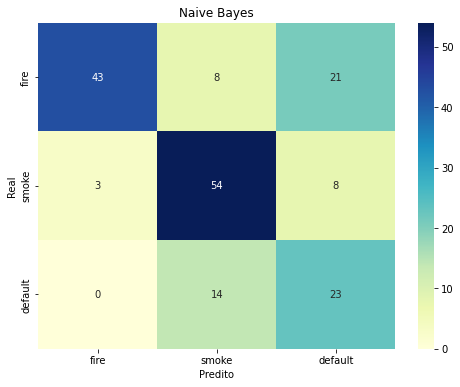

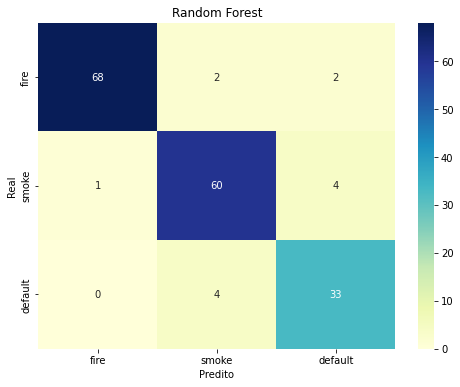

In [ ]:
models = ['KNN', 'MLP', 'SGDC', 'SVM', 'Árvore de Decisão', 'Naive Bayes', 'Random Forest']

for i in range(len(models)):
  print(models[i])
  acc = metrics.accuracy_score(y_test,results[i])
  recall = metrics.recall_score(y_test,results[i],average=None)
  precision = metrics.precision_score(y_test,results[i],average=None,zero_division=1)
  f1 = metrics.f1_score(y_test,results[i],average=None)
  print('Acurácia: ', acc)
  print('Recall: ', recall)
  print('Precisão: ', precision)
  print('F1-score: ', f1)
  get_confusion_matrix(y_test, results[i], models[i])
  print('\n')

In [ ]:
models = ['KNN', 'MLP', 'SGDC', 'SVM', 'Árvore de Decisão', 'Naive Bayes', 'Random Forest']

for i in range(len(models)):
  print(models[i])
  acc = metrics.accuracy_score(y_test,results[i])
  recall = metrics.recall_score(y_test,results[i],average='macro')
  precision = metrics.precision_score(y_test,results[i],average='macro',zero_division=1)
  f1 = metrics.f1_score(y_test,results[i],average='macro')
  print('Acurácia: ', acc)
  print('Recall: ', recall)
  print('Precisão: ', precision)
  print('F1-score: ', f1)
  print('\n')

KNN
Acurácia:  0.9195402298850575
Recall:  0.9102968352968354
Precisão:  0.9102968352968354
F1-score:  0.9102968352968354


MLP
Acurácia:  0.9482758620689655
Recall:  0.9427023177023178
Precisão:  0.9367623117623118
F1-score:  0.9394493177387915


SGDC
Acurácia:  0.9252873563218391
Recall:  0.8984060984060984
Precisão:  0.9337173568950087
F1-score:  0.9111416475048243


SVM
Acurácia:  0.9195402298850575
Recall:  0.9059174559174559
Precisão:  0.9136408730158729
F1-score:  0.9094069152208687


Árvore de Decisão
Acurácia:  0.8390804597701149
Recall:  0.8366154616154616
Precisão:  0.821224139703198
F1-score:  0.8243630612597919


Naive Bayes
Acurácia:  0.6896551724137931
Recall:  0.6832043582043582
Precisão:  0.6958722055976061
F1-score:  0.6705416462382714


Random Forest
Acurácia:  0.9252873563218391
Recall:  0.9198044198044197
Precisão:  0.9135840005405224
F1-score:  0.9163301980249742




## Conclusão

Todas as pipelines que extraem features a partir de histogramas (seja com sistema de cor HSV ou RGB) apresentaram desempenho satisfatório (Precisão e Recall > 0,9), levando em consideração o melhor modelo. Técnicas de realce de imagem e equalização de histograma não mostraram diferença significativa no desempenho dos modelos. Os melhores modelos, dentre os testados, foram o MLP e o  Random Forest.